In [19]:
import pandas as pd
import numpy as np
import matplotlib as mp
import random 
import seaborn as sns
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
orders_det = pd.read_csv('C:\\Users\\Mi\\Desktop\\Республика\\olist_order_items_dataset.csv')
orders = pd.read_csv('C:\\Users\\Mi\\Desktop\\Республика\\olist_orders_dataset.csv')
users = pd.read_csv('C:\\Users\\Mi\\Desktop\\Республика\\olist_customers_dataset.csv')

In [ ]:
## Перевести колонки с датами в формат datetime
cols = orders.columns[3:]
orders[cols] = orders[cols].apply(pd.to_datetime, errors='coerce')
orders_det["shipping_limit_date"]=orders_det["shipping_limit_date"].apply(pd.to_datetime, errors='coerce')


In [15]:
test=ords.merge(id_users, on='customer_id', how='left')

NameError: name 'ords' is not defined

In [6]:
t2=test.groupby('customer_unique_id').agg(n_ord=('order_id','count'))

NameError: name 'test' is not defined

### У 93099 людей 1 покупка за всё время

In [5]:
t2[t2['n_ord']==1].shape 

NameError: name 't2' is not defined

#### Сколько товаров в месяц не доставляется с детализацией причин(пусть будет canceled и unavailable

In [279]:
orders['month_n'] = orders.order_purchase_timestamp.dt.month

In [280]:
tt2=orders[orders['order_status'].str.contains('unavailable|canceled' )] \
    .groupby(['order_status', 'month_n']) \
    .agg(n_ord=('order_id','count')) \
    .groupby('order_status').agg('mean','month_n').round(2)
   

In [281]:
tt2
#### В среднем в месяц товаров у которых статус canceled и unavailable 52.08 и 50.75

,n_ord
order_status,
canceled,52.08
unavailable,50.75


#### В  какой день недели чаще покупают тот или иной товар?

In [35]:
orders['day']=orders.order_approved_at.dt.dayofweek

#### Добавим поле product_id к таблице orders

In [36]:
prod_n=orders.merge(orders_det[['order_id','product_id']], on='order_id')\
    .groupby(['day','product_id']).agg(n_day=('day','count'))\
    .sort_values(by=['n_day','day'],ascending=False)

In [ ]:
### Больше всего товаров покупали в понедельник и вторник 

In [42]:
prod_n.reset_index().head(n=40)

,day,product_id,n_day
0,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,119
1,1.0,53b36df67ebb7c41585e8d54d6772e08,105
2,4.0,aca2eb7d00ea1a7b8ebd4e68314663af,96
3,2.0,aca2eb7d00ea1a7b8ebd4e68314663af,89
4,1.0,422879e10f46682990de24d770e7f83d,89
5,4.0,422879e10f46682990de24d770e7f83d,87
6,1.0,99a4788cb24856965c36a24e339b6058,82
7,3.0,368c6c730842d78016ad823897a372db,80
8,3.0,422879e10f46682990de24d770e7f83d,80
9,1.0,368c6c730842d78016ad823897a372db,75


In [285]:
prods=orders.merge(orders_det[['order_id','product_id']], on='order_id') \
    .groupby(['day','order_approved_at','product_id'])\
    .agg(n_wd=('day','count')).reset_index()

In [286]:
prods['cal_wday']=prods.order_approved_at.dt.date

### Сколько товаров покупают в среднем в каждый день недели?

In [287]:
prods.groupby(['day','cal_wday']).agg(prod_count=('product_id','count')).reset_index() \
    .groupby('day').agg(pr_count=('prod_count','mean'))

,pr_count
day,
0.0,154.528736
1.0,224.863636
2.0,186.103448
3.0,179.179775
4.0,171.738636
5.0,146.651163
6.0,109.376471


#### Попытка когортного анализа покупок?

In [288]:
orders['cal_date']=orders.order_approved_at.dt.date

In [22]:
orders=orders.merge(users[['customer_id','customer_unique_id']], on='customer_id')

In [23]:
orders.groupby('customer_unique_id').agg(n_ord=('order_approved_at','min')).sort_values('n_ord',ascending=False).dropna()

,n_ord
customer_unique_id,
24ac2b4327e25baf39f2119e4228976a,2018-08-29 15:10:26
b701bebbdf478f5500348f03aff62121,2018-08-29 15:05:22
5c58de6fb80e93396e2f35642666b693,2018-08-29 14:31:07
7febafa06d9d8f232a900a2937f04338,2018-08-29 14:30:23
7a22d14aa3c3599238509ddca4b93b01,2018-08-29 12:35:17
...,...
88bc832f104b6dd684a17dbb1b76e778,2016-10-04 10:25:46
87776adb449c551e74c13fc34f036105,2016-10-04 10:19:23
b8b8726af116a5cfb35b0315ecef9172,2016-10-04 10:18:57


In [24]:
n_orders=orders.groupby(['customer_unique_id'])['order_id'].nunique()

In [25]:
mult_orders_perc = np.sum(n_orders > 1) / orders['customer_id'].nunique()

In [26]:
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

3.01% of customers ordered more than once.


#### Только 3% от покупателей совершили более чем 1 покупку за всё время

In [27]:
dd = orders[['customer_unique_id', 'order_id', 'order_approved_at']].drop_duplicates()

In [28]:
dd['order_month'] = dd['order_approved_at'].dt.to_period('M')
dd['cohort'] = dd.groupby('customer_unique_id')['order_approved_at'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [29]:
df_cohort = dd.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [30]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')


In [31]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

#### Какие данные такой retention

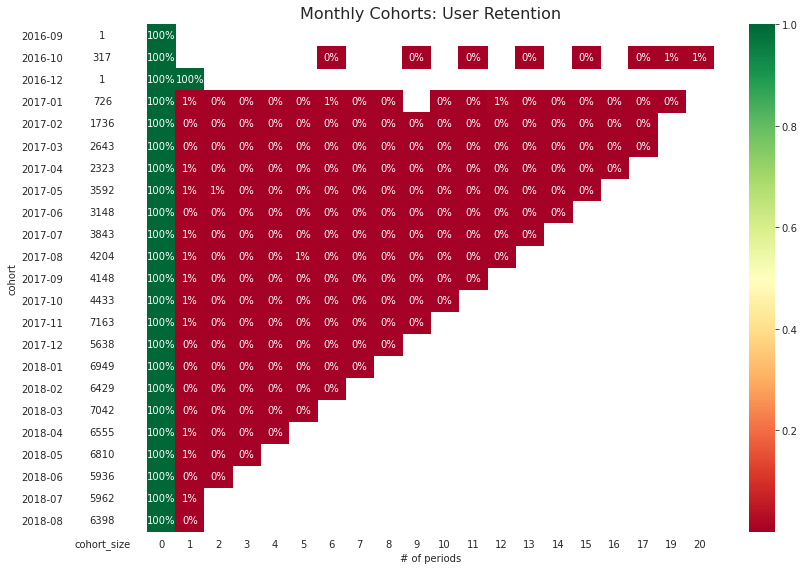

In [32]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.000%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()